# **Churn Prediction of Customers**

**DATASET**

The Dataset is a fictional dataset of customer churn from telecom industry. Dataset is obtained from:
https://www.kaggle.com/blastchar/telco-customer-churn

#### **ATTRIBUTES**


The following are the features present in the dataset


***Target Feature:***

  Churn: Whether the customer churned or not (Yes or No)


***Seventeen categorical Features:***

Features related to Customer Personal details:

  1. **CustomerID:** Customer ID , a unique ID for each customer
  2. **gender:** Whether the customer is a male or a female
  3. **SeniorCitizen:** Whether the customer is a senior citizen or not 
  4. **Partner:** Whether the customer has a partner or not 
  5. **Dependents:** Whether the customer has dependents or not

Features based on the services opted by the Customer:

  6. **Contract:** The contract term of the customer (Month-to-month, One year, Two years)
  7. **PaperlessBilling:** Whether the customer has paperless billing or not 
  8. **PaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
  9. **PhoneService:** Whether the customer has a phone service or not
  
If the customer has opted "PhoneSevice" the following are features are to be considered

  10. **MultipleLines:** Whether the customer has multiple phone lines or not
  11. **InternetService:** Type of Internet Connection opted by Customer. (DSL, Fiber optic, No)

If the customer has opted "InternetService" the following are features are to be considered

  12. **OnlineSecurity:** Whether the customer has online security or not 
  13. **OnlineBackup:** Whether the customer has an online backup or not 
  14. **DeviceProtection:** Whether the customer has device protection or not 
  15. **TechSupport:** Whether the customer has tech support or not 
  16. **StreamingTV:** Whether the customer has streaming TV or not 
  17. **StreamingMovies:** Whether the customer has streaming movies or not 

***Three numerical Features:***

  18. **MonthlyCharges:** The amount charged to the customer monthly
  19. **TotalCharges:** The total amount charged to the customer
  20. **Tenure:** Number of months the customer has used the services of the company / stayed with the company 

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Basic Python Packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# Packages for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# packages for model evaluation
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, f1_score, fbeta_score, make_scorer
#Packages for Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df1 = pd.read_csv('telecom_customer_churn.csv')
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df1.shape

(7043, 21)

### Drop irrelevant columns

In [ ]:
df = df1.drop({'customerID'}, axis='columns')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values in the dataset

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

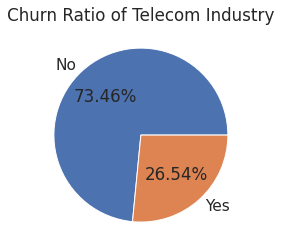

In [ ]:
plt.figure(figsize=(6, 4))
plt.pie(df.Churn.value_counts()/df.shape[0], labels = df.Churn.unique(), autopct='%1.2f%%')
plt.title("Churn Ratio of Telecom Industry")
plt.show()

In [ ]:
df['TotalCharges'].min()

' '

In [ ]:
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df = df[df['TotalCharges'] != ' ']
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Customer Churn Based on Customer Tenure

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


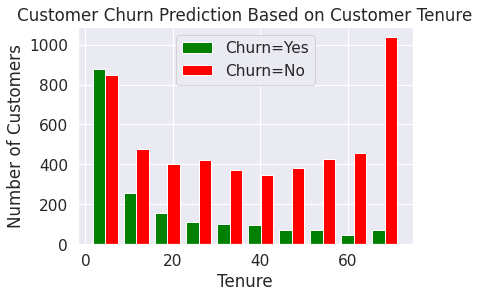

In [ ]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes  = df[df.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Based on Customer Tenure')
plt.legend()

**Observation:**

* We can see that the Churn customers have a shorter tenure, which means that the newly joined customers are not satisfied with our services or facing some issues.

### Customer Churn Based on Monthly Charges

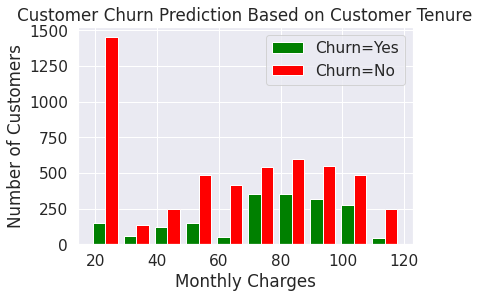

In [ ]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges
mc_churn_yes  = df[df.Churn=='Yes'].MonthlyCharges

plt.hist([mc_churn_yes, mc_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Based on Customer Tenure')
plt.legend()

**Observation:**
* The Churn Customer have a high monthly charges than those who don't.

**Viewing the Unique Values of Each Column**

In [ ]:
def print_unique_col_values(data_frame):
    for column in df:
        if df[column].dtypes=='object': 
            print(f'{column} : {df[column].unique()}')

In [ ]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


**Replacing the 'No internet service' and 'No phone service' with 'No' in our dataframe**

In [ ]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [ ]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### **Encoding of Categorical Features**

**Replacing 'Yes' with 1 and 'No' with 0**

In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df[col].replace({'Yes' : 1,
                     'No' : 0}, inplace=True)

**Replacing 'Female' with 1 and 'Male' with 0**

In [ ]:
df['gender'].replace({'Female' : 1,
                     'Male' : 0}, inplace=True)

In [ ]:
df = pd.get_dummies(df, columns=['InternetService','Contract','PaymentMethod'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5193,1,0,1,0,1.000000,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1707,1,1,0,0,0.028169,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
6910,0,0,0,1,0.971831,1,1,1,1,1,...,0,1,0,0,0,1,0,0,1,0
6115,1,0,1,1,1.000000,1,0,1,1,1,...,0,1,0,0,0,1,0,1,0,0
2101,1,0,1,0,0.507042,1,1,1,0,1,...,0,1,0,0,1,0,0,0,1,0


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

## **Feature selection**

# train and test data  split

In [ ]:
X = df.drop(['Churn'], axis = 1)
Y = df['Churn']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, stratify = Y, test_size = 0.25, random_state= 13)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5274, 26), (1758, 26), (5274,), (1758,))

In [ ]:
x_train.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
Contract_Month-to-month        

## **Model Selection**

The model that will be used are :
1. Logistic Regression
2. LinearSVC
3. Kernal SVC
4. KNN
5. Random Forest

In [ ]:
def plot_confusion_matrix(y_test, pred):
  cm = confusion_matrix(y_test, pred)
  
  df_cm = pd.DataFrame(cm, [0,1], [0,1])
  plt.figure(figsize=(5,3))
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(df_cm, annot=True, fmt='g', cbar=False, cmap="YlGnBu") # font size , annot_kws={"size": 16}
  plt.title('Confusion Matrix\n', y=1.1)
  plt.ylabel('Actual label\n')
  plt.xlabel('Predicted label\n')

  plt.show()

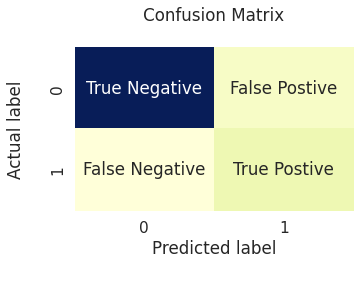

In [ ]:
# the above function will return confusion matrix with values in the following format 
df_cm = pd.DataFrame([[1000,200],[150,250]],[0,1], [0,1])
annot_arr = np.array([['True Negative','False Postive'],['False Negative','True Postive']], dtype = str)
plt.figure(figsize=(5,3))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=annot_arr, fmt='s', cbar=False, cmap="YlGnBu") # font size , annot_kws={"size": 16}
plt.title('Confusion Matrix\n', y=1.1)
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
plt.show()

**Metrics for Model Evaluation:**

The dataset is imbalanced, so accuracy is not a suitable metric in this case. Our main objective is to find all the customers who churn. So True Positive is more important.

In this case, the False Negative ( Actually Churn but Predicted an Not Churn) is more costly than False Postive. **So we take F2-Score as a metric.**

F2-Score is a fbeta_score with beta value = 2, 
F2-measure has the effect of lowering the importance of precision and increase the importance of recall,then the F2-Measure puts more attention on minimizing false negatives than minimizing false positives.

In [ ]:
# Creating F2 score for the 'scoring' parameter of the RandomizedSearchCV
fTwo_scorer = make_scorer(fbeta_score, beta=2)

In [ ]:
def model_metrics(table_name,model_name, y_test, pred, print_cm , print_cr):
  if print_cm == True:
    plot_confusion_matrix(y_test, pred)
    print("\n")
  if print_cr == True:
    print(classification_report(y_test, pred),"\n")

  acc = round( accuracy_score(y_test, pred),4)
  precision = round(precision_score(y_test, pred),4)
  recall = round(recall_score(y_test, pred),4)
  f1 = round(f1_score(y_test, pred),4)
  f2 = round(fbeta_score(y_test, pred, beta = 2),4)

  table_name.loc[table_name.shape[0]] = [model_name ,acc, precision, recall, f1, f2]

In [ ]:
model_performance_without_hypertuning = pd.DataFrame(columns = ['model_name' ,'acc', 'precision', 'recall', 'f1', 'f2'])

In [ ]:
model_performance_after_hypertuning = pd.DataFrame(columns = ['model_name' ,'acc', 'precision', 'recall', 'f1', 'f2'])

In [ ]:
models_without_hp = []

models_without_hp.append(('Logistic Regression', LogisticRegression(random_state = 13)))

models_without_hp.append(('Linear SVC', SVC(kernel = 'linear', random_state = 13)))

models_without_hp.append(('Kernal SVC', SVC(kernel = 'rbf', random_state = 13)))

models_without_hp.append(('KNN', KNeighborsClassifier()))

models_without_hp.append(('Random Forest', RandomForestClassifier(random_state = 13)))

models_without_hp.append(('catboost', CatBoostClassifier(iterations=50, # number of models
    random_seed=7, 
    learning_rate=0.5, # always between 0-1
    custom_loss=['AUC', 'Accuracy'])))

models_without_hp.append(('XGboost', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=13)))


In [ ]:
for name, model in models_without_hp:
  
  md = model.fit(x_train, y_train)
  pred = md.predict(x_test)

  model_metrics(model_performance_without_hypertuning, name, y_test, pred, False, False)

model_performance_without_hypertuning

0:	learn: 0.4770087	total: 3.92ms	remaining: 192ms
1:	learn: 0.4332161	total: 7.49ms	remaining: 180ms
2:	learn: 0.4161118	total: 10.9ms	remaining: 171ms
3:	learn: 0.4067228	total: 14.4ms	remaining: 166ms
4:	learn: 0.4023979	total: 18.2ms	remaining: 163ms
5:	learn: 0.3973740	total: 21.8ms	remaining: 160ms
6:	learn: 0.3950787	total: 25.8ms	remaining: 159ms
7:	learn: 0.3923700	total: 35ms	remaining: 184ms
8:	learn: 0.3889459	total: 42.4ms	remaining: 193ms
9:	learn: 0.3866756	total: 47.6ms	remaining: 190ms
10:	learn: 0.3817086	total: 51.4ms	remaining: 182ms
11:	learn: 0.3788577	total: 55.2ms	remaining: 175ms
12:	learn: 0.3759361	total: 58.8ms	remaining: 167ms
13:	learn: 0.3726045	total: 62.4ms	remaining: 161ms
14:	learn: 0.3692355	total: 66ms	remaining: 154ms
15:	learn: 0.3671173	total: 69.6ms	remaining: 148ms
16:	learn: 0.3648233	total: 73.4ms	remaining: 142ms
17:	learn: 0.3613540	total: 77ms	remaining: 137ms
18:	learn: 0.3591274	total: 80.6ms	remaining: 132ms
19:	learn: 0.3569589	total: 

,model_name,acc,precision,recall,f1,f2
0,Logistic Regression,0.8106,0.6791,0.5439,0.6040,0.5665
1,Linear SVC,0.8100,0.6755,0.5482,0.6052,0.5696
2,Kernal SVC,0.8043,0.6793,0.4989,0.5753,0.5269
3,KNN,0.7765,0.5864,0.5375,0.5609,0.5466
4,Random Forest,0.7929,0.6528,0.4711,0.5473,0.4989
5,catboost,0.7901,0.6450,0.4668,0.5416,0.4941
6,XGboost,0.7708,0.5825,0.4839,0.5287,0.5009


## **Hyper Paramaeter Tuning of models:**

#### **Logistic Regression**

In [ ]:
log_reg = LogisticRegression(random_state = 13, max_iter= 1000)

param_dist = {
    'C' : [0.0001,0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty' : ['l1', 'l2',None]
}

log_reg_hp =  RandomizedSearchCV(log_reg , param_distributions = param_dist ,  scoring = fTwo_scorer , cv = 5, random_state= 13)
result1 = log_reg_hp.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    % (all_penalties, penalty)
ValueError:

In [ ]:
print(result1.best_estimator_)

LogisticRegression(max_iter=1000, random_state=13)


In [ ]:
pred_1 = result1.predict(x_test)

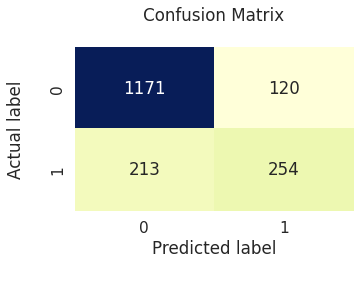



              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1291
           1       0.68      0.54      0.60       467

    accuracy                           0.81      1758
   macro avg       0.76      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758
 

            model_name     acc  precision  recall     f1      f2
0  Logistic Regression  0.8106     0.6791  0.5439  0.604  0.5665


In [ ]:
model_metrics(model_performance_after_hypertuning, 'Logistic Regression', y_test, pred_1, True, True)

print(model_performance_after_hypertuning.tail(1))

#### **Linear SVC**

In [ ]:
linear_SVC = SVC(kernel = 'linear', random_state = 13)

param_dist = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

linear_SVC_hp =  RandomizedSearchCV(linear_SVC, param_distributions = param_dist , scoring = fTwo_scorer , cv = 5, random_state= 13)
result2 = linear_SVC_hp.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [ ]:
print(result2.best_estimator_)

pred_2 = result2.predict(x_test)

SVC(C=0.1, kernel='linear', random_state=13)


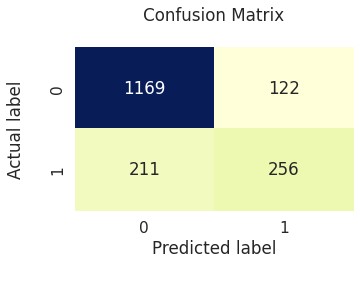



              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1291
           1       0.68      0.55      0.61       467

    accuracy                           0.81      1758
   macro avg       0.76      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758
 

   model_name     acc  precision  recall      f1      f2
1  Linear SVC  0.8106     0.6772  0.5482  0.6059  0.5699


In [ ]:
model_metrics(model_performance_after_hypertuning, 'Linear SVC', y_test, pred_2, True, True)

print(model_performance_after_hypertuning.tail(1))

#### **Kernal SVC**

In [ ]:
kernal_SVC = SVC(kernel = 'rbf', random_state = 13)

param_dist = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'gamma' : [ 0.0001 , 0.001, 0.01, 0.1, 1.0, 10]
}

kernal_SVC_hp =  RandomizedSearchCV(kernal_SVC, param_distributions = param_dist , scoring = fTwo_scorer , cv = 5, random_state= 13)
result3 = kernal_SVC_hp.fit(x_train, y_train)

In [ ]:
print(result3.best_estimator_)

pred_3 = result3.predict(x_test)

SVC(C=100.0, gamma=0.001, random_state=13)


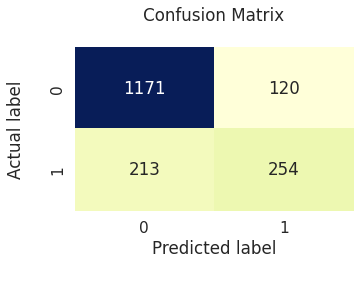



              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1291
           1       0.68      0.54      0.60       467

    accuracy                           0.81      1758
   macro avg       0.76      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758
 

   model_name     acc  precision  recall     f1      f2
2  Kernal SVC  0.8106     0.6791  0.5439  0.604  0.5665


In [ ]:
model_metrics(model_performance_after_hypertuning, 'Kernal SVC', y_test, pred_3, True, True)

print(model_performance_after_hypertuning.tail(1))

#### **KNN**

In [ ]:
f2_score_list = []
# odd number of neighbours help in better classification in knn, if even neighbours are given then there can be draw between the number of neighbours supporting each class.
neighbors = [x for x in range(1,40) if x % 2 != 0]
print("K-Neighbours considered are :",neighbors)
for i in neighbors:
 knn = KNeighborsClassifier(n_neighbors=i)
 cross_val_scr = cross_val_score(knn, x_train, y_train, scoring = fTwo_scorer, cv=5)
 f2_score_list.append(cross_val_scr.mean())

K-Neighbours considered are : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]


Max F2 score:- 0.5714974559149631 at K = 39


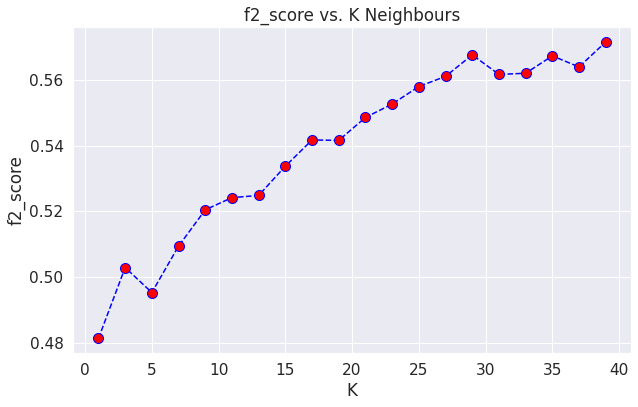

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(neighbors,f2_score_list,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('f2_score vs. K Neighbours')
plt.xlabel('K')
plt.ylabel('f2_score')
max_index = f2_score_list.index(max(f2_score_list))
max_index = neighbors[max_index]
print("Max F2 score:-",max(f2_score_list),"at K =",max_index)

So, let us take k=39 as the optimum value of K 

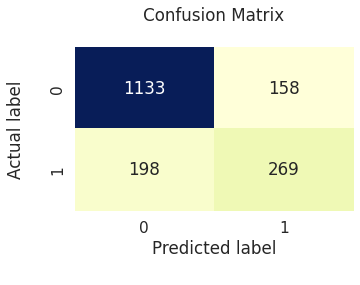



              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1291
           1       0.63      0.58      0.60       467

    accuracy                           0.80      1758
   macro avg       0.74      0.73      0.73      1758
weighted avg       0.79      0.80      0.79      1758
 



,model_name,acc,precision,recall,f1,f2
3,KNN,0.7975,0.63,0.576,0.6018,0.5861


In [ ]:
knn = KNeighborsClassifier(n_neighbors=39)
KNN = knn.fit(x_train, y_train)
pred_4 = KNN.predict(x_test)

model_metrics(model_performance_after_hypertuning, 'KNN', y_test, pred_4, True, True)

model_performance_after_hypertuning.tail(1)

#### **Random Forest**

In [ ]:
max_depth = [int(x) for x in np.linspace(10, 80, num = 11)]
max_depth.append(None)

param_grid = {'n_estimators' : [40,80,100,120,160,200,250,300],
              'max_depth' : max_depth,
              'min_samples_split' : [None,2,4,6,8],
              'min_samples_leaf' : [None,1,2,3],
              'criterion': ['gini','entropy'],
              'max_features' : ['sqrt', 'log2']}

In [ ]:
rf = RandomForestClassifier(random_state=13)

random_forest_hp =  RandomizedSearchCV(rf, param_distributions = param_grid , scoring = fTwo_scorer , cv = 5, random_state= 13)
result5 = random_forest_hp.fit(x_train, y_train)

result5.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=8, n_estimators=80, random_state=13)

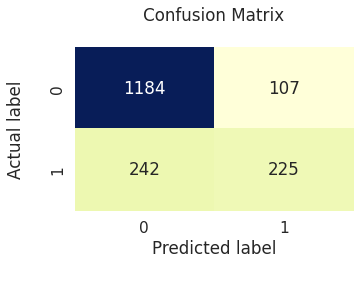



              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1291
           1       0.68      0.48      0.56       467

    accuracy                           0.80      1758
   macro avg       0.75      0.70      0.72      1758
weighted avg       0.79      0.80      0.79      1758
 



,model_name,acc,precision,recall,f1,f2
4,Random_forest,0.8015,0.6777,0.4818,0.5632,0.5114


In [ ]:
pred_5 = random_forest_hp.predict(x_test)

model_metrics(model_performance_after_hypertuning, 'Random_forest', y_test, pred_5, True, True)

model_performance_after_hypertuning.tail(1)

## **Model Evaluation**

In [ ]:
model_performance_without_hypertuning

,model_name,acc,precision,recall,f1,f2
0,Logistic Regression,0.8106,0.6791,0.5439,0.6040,0.5665
1,Linear SVC,0.8100,0.6755,0.5482,0.6052,0.5696
2,Kernal SVC,0.8043,0.6793,0.4989,0.5753,0.5269
3,KNN,0.7765,0.5864,0.5375,0.5609,0.5466
4,Random Forest,0.7929,0.6528,0.4711,0.5473,0.4989
5,catboost,0.7901,0.6450,0.4668,0.5416,0.4941
6,XGboost,0.7708,0.5825,0.4839,0.5287,0.5009


In [ ]:
model_performance_after_hypertuning

,model_name,acc,precision,recall,f1,f2
0,Logistic Regression,0.8106,0.6791,0.5439,0.6040,0.5665
1,Linear SVC,0.8106,0.6772,0.5482,0.6059,0.5699
2,Kernal SVC,0.8106,0.6791,0.5439,0.6040,0.5665
3,KNN,0.7975,0.6300,0.5760,0.6018,0.5861
4,Random_forest,0.8015,0.6777,0.4818,0.5632,0.5114


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
'n_estimators' : [ 50, 200, 500],
'subsample' : [0.7, 0.8, 0.9],
'max_depth' :[ 3, 5,7],
'max_features' : ['sqrt', 'log2']
}

In [ ]:
gscv =GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = param_grid, cv=2, verbose=2)

In [ ]:
gscv.fit(x_train,y_train)

Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] END max_depth=3, max_features=sqrt, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END max_d

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 200, 500],
                         'subsample': [0.7, 0.8, 0.9]},
             verbose=2)

In [ ]:
gscv.best_params_ # best params may differ --> because random selection of CV rows

{'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50, 'subsample': 0.7}

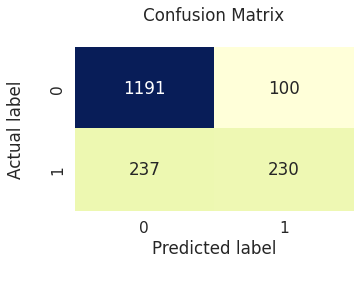



              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1291
           1       0.70      0.49      0.58       467

    accuracy                           0.81      1758
   macro avg       0.77      0.71      0.73      1758
weighted avg       0.80      0.81      0.80      1758
 



,model_name,acc,precision,recall,f1,f2
5,xgboost,0.8083,0.697,0.4925,0.5772,0.5232


In [ ]:
pred_6 = gscv.predict(x_test)

model_metrics(model_performance_after_hypertuning, 'xgboost', y_test, pred_6, True, True)

model_performance_after_hypertuning.tail(1)